In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima

get_ipython().system(' pip install pmdarima')

from pmdarima.arima import auto_arima

In [2]:
sales_data = pd.read_csv("Champaigne Sales.csv")

In [3]:
sales_data.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


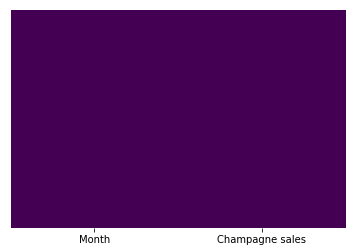

In [4]:
#Make sure there are no null values
sns.heatmap(sales_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#Make sure there are no null values
sales_data.isnull().value_counts()

Month  Champagne sales
False  False              105
dtype: int64

In [6]:
#Check the datatypes
print(sales_data.dtypes)

Month              object
Champagne sales     int64
dtype: object


In [7]:
#Convert the month column to datetime
sales_data['Month']=pd.to_datetime(sales_data['Month'])

In [8]:
#Recheck the datatypes
sales_data.dtypes

Month              datetime64[ns]
Champagne sales             int64
dtype: object

In [9]:
sales_data.head()

,Month,Champagne sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


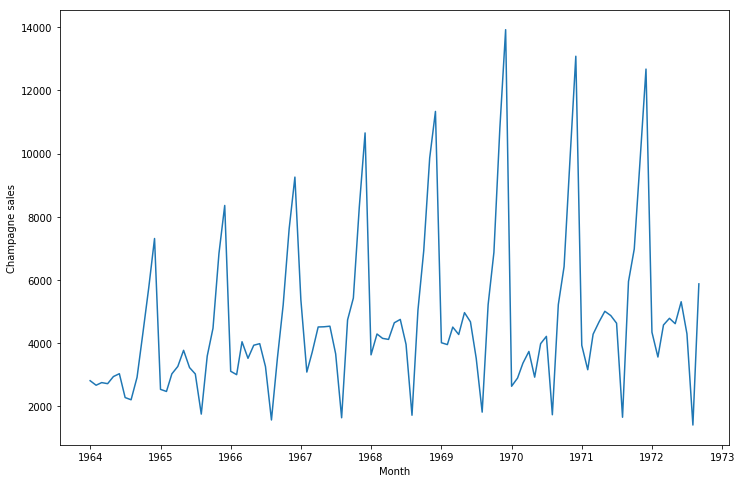

In [10]:
# To understand the pattern
plt.figure(figsize=(12,8))
sns.lineplot(data=sales_data, x='Month', y= 'Champagne sales')

In [11]:
#Set the index of the Month 
sales_data.set_index('Month',inplace=True)

#### Stationarity is an important concept in time series analysis. ... Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time. Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

In [12]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

pval : float
The computed P-value of the test.

sig : bool
Whether the P-value is significant at the alpha level. More directly, whether to difference the time series.

In [13]:
#Spliting the dataset into train and test
train = sales_data[:85]
test = sales_data[-20:]

In [14]:
train.tail()

,Champagne sales
Month,
1970-09-01,5221
1970-10-01,6424
1970-11-01,9842
1970-12-01,13076
1971-01-01,3934


In [15]:
test.head()

,Champagne sales
Month,
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676
1971-05-01,5010
1971-06-01,4874


Text(0,0.5,'Sales')

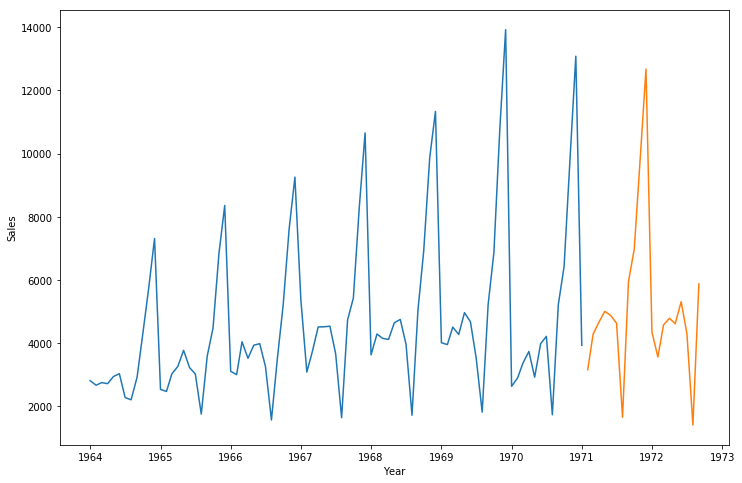

In [16]:
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.xlabel('Year')
plt.ylabel('Sales')

In [17]:

arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=1.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.66 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.39 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.72 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.21 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.04 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.57 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.631, Time=2.38 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.73 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [18]:
#Summary of the model
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Sun, 18 Jul 2021   AIC                           1174.564
Time:                                     22:09:19   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.687439
1971-03-01,3247.922866
1971-04-01,3592.489859
1971-05-01,2800.883235
1971-06-01,3841.887859
1971-07-01,4088.024953
1971-08-01,1596.292147
1971-09-01,5090.002548
1971-10-01,6283.993325


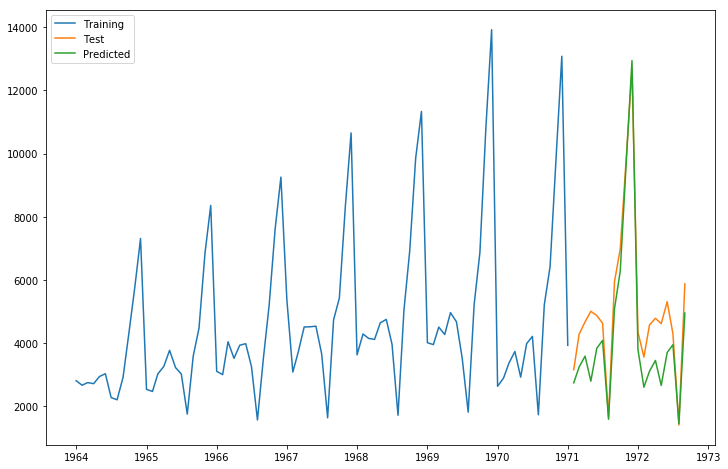

In [20]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [21]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

0.8114731998341046